# Customer Churn data

“Customer Churn” refers to the loss of customers. That is, if a customer or a client stops taking services from a company, it is said that he/she has churned.

Churn is intimately connected to a company’s performance. The more one learns about buyers’ behavior, the more money one can make. Analyzing customer churn also aids in finding and improving the shortcomings of services provided by the company.

We will try to investigate the dataset and try to answer these questions:

(1) what is the likelihood of an active customer leaving an organization? 
(2) what are key indicators of a customer churn? 
(3) what retention strategies can be implemented based on the results to diminish prospective customer churn?

<a id="s1"></a>
# loading libraries

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv


<a id="s2"></a> <br>
# reading the csv file

In [2]:
df = pd.read_csv("../input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv")

<a id="s3"></a>
# intial exploration

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

It seems we have many categorical variables such as gender, SeniorCitizen, Partner and some numerical features like, TotalCharges, MonthlyCharges. Finally the categorical variable Churn is the one that matters most, whether or not the customer has churned. We need to inspect the datatypes for each variable

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['SeniorCitizen', 'tenure'], float64: ['MonthlyCharges'], object: ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']}

<a id="s3_1"></a>
# exploring all the values per feature

In [7]:
for elem in df.columns[1:]:
    print(df[elem].value_counts())
    print("\n")

Male      3555
Female    3488
Name: gender, dtype: int64


0    5901
1    1142
Name: SeniorCitizen, dtype: int64


No     3641
Yes    3402
Name: Partner, dtype: int64


No     4933
Yes    2110
Name: Dependents, dtype: int64


1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64


Yes    6361
No      682
Name: PhoneService, dtype: int64


No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64


No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64


No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64


No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: 

So far we have many categorical variables, seems that the feature TotalCharges should be float data type however, it is object instead. It needs to be changed. Lets try to inspect it.

<a id="s3_3_3"></a>
# Preprocessing

In [8]:
df['TotalCharges'].value_counts()

          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6531, dtype: int64

In [9]:
### preprocessing the TotalCharges, changing the null values with zero

df.loc[ df['TotalCharges'] == ' ', 'TotalCharges'] = 0
df["TotalCharges"] = df["TotalCharges"].astype("float64") 

In [10]:
### preprocessing the senior citizens feature, converting from int64 to object type

df["SeniorCitizen"] = df["SeniorCitizen"].astype("object") 

<a id="s3_2"></a>
# Checking for NA values

In [11]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

We have no missing values! That is good news! :D

<a id="s3_3"></a>
# Initial EDA, trying to understand the data

Lets try to observe how the data, we need to see some descriptive statistics

In [12]:
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304
std,24.559481,30.090047,2266.794470
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,398.550000
50%,29.000000,70.350000,1394.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


<a id="s3_4"></a>
# Exploring Churn with other numerical variables

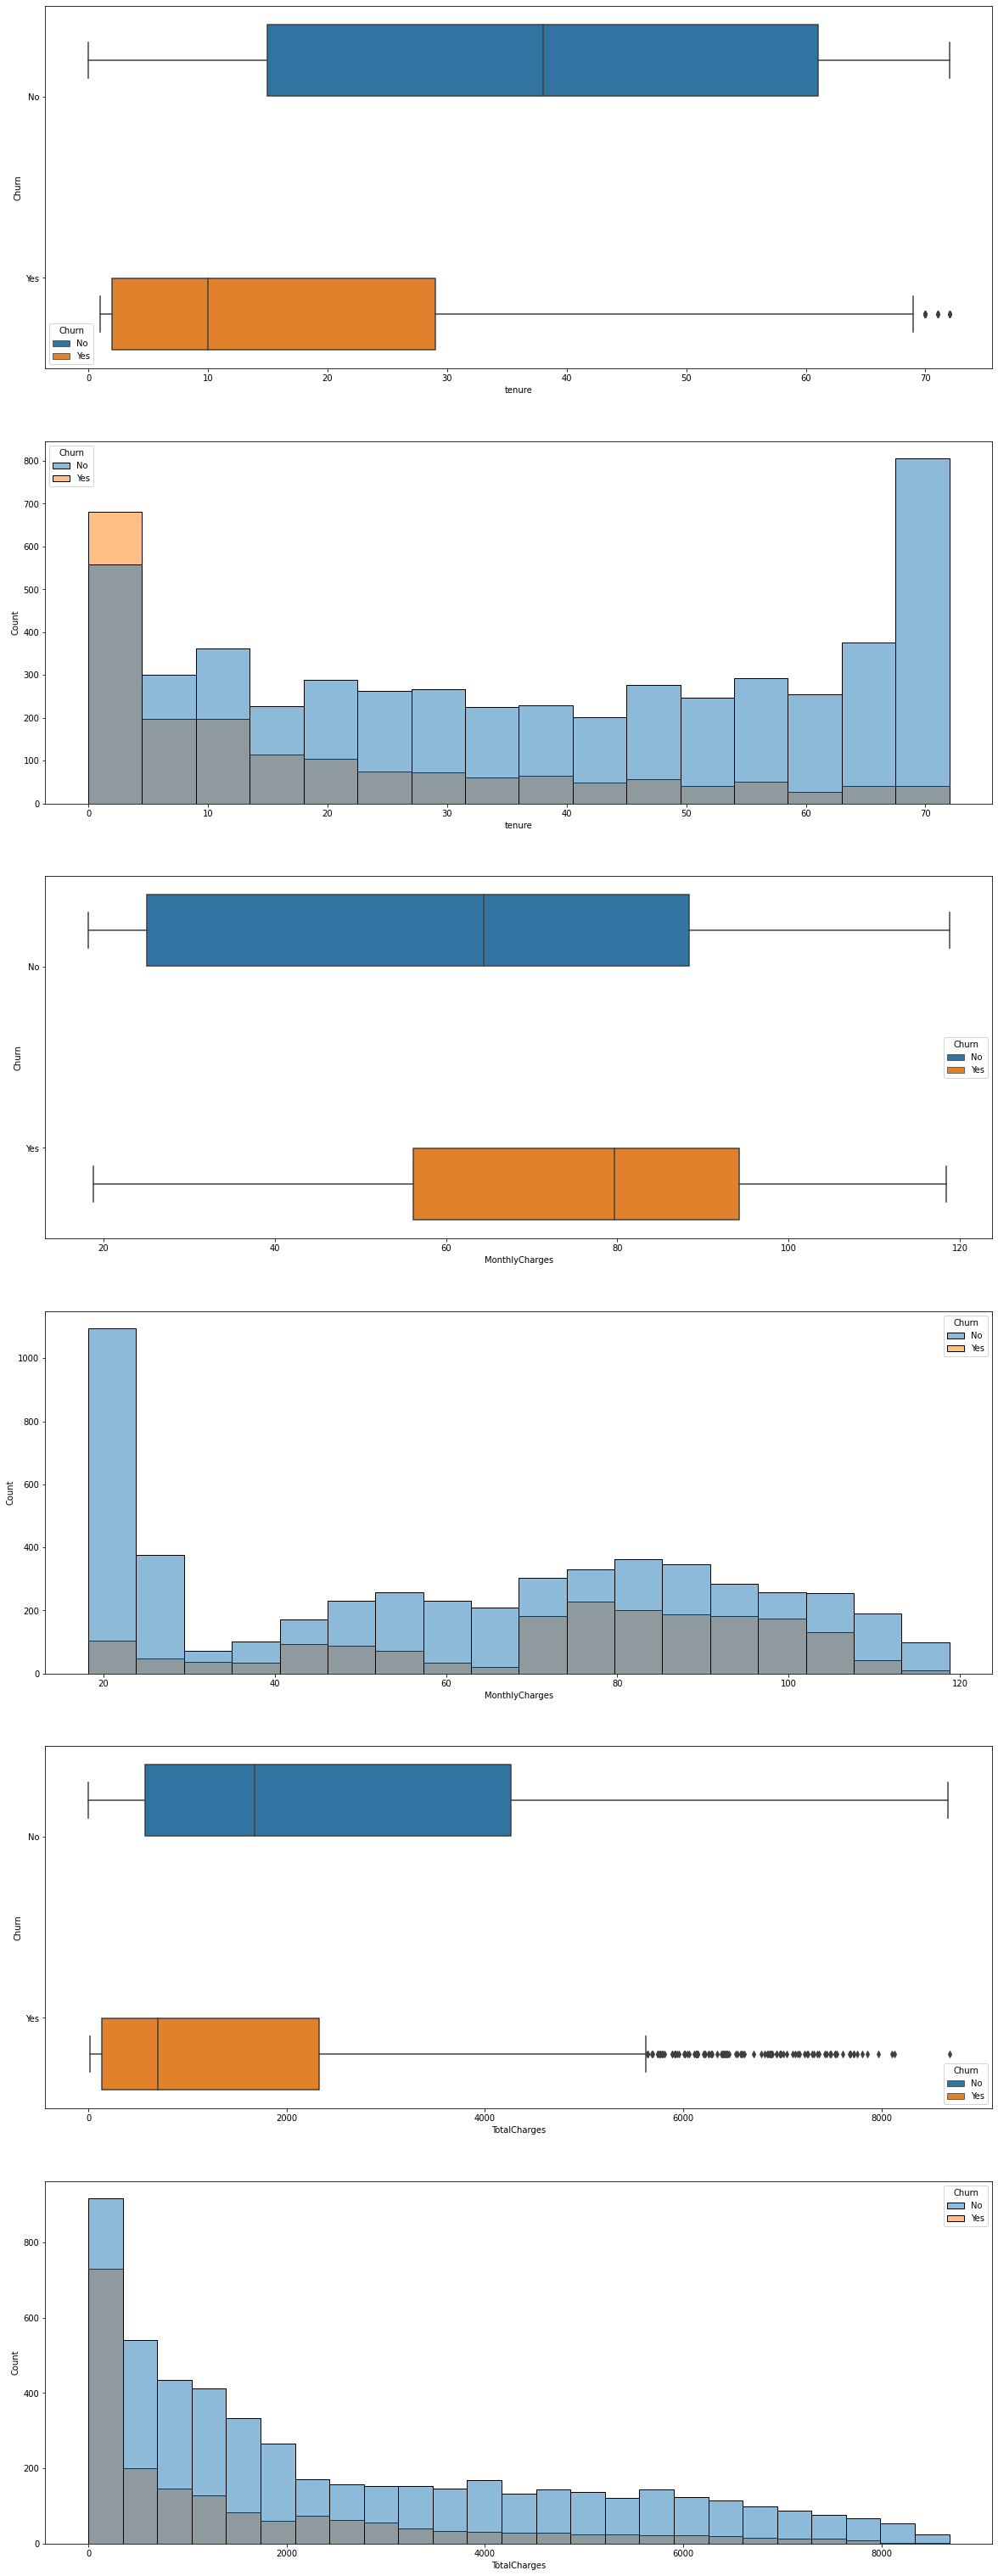

In [13]:
fig, ax = plt.subplots(6, figsize=(20, 55))

g=sns.boxplot(data=df, x="tenure", y="Churn", ax=ax[0], hue="Churn")
g=sns.histplot(data=df, x="tenure", ax=ax[1], hue="Churn")


g=sns.boxplot(data=df, x="MonthlyCharges", y="Churn", ax=ax[2], hue="Churn")
g=sns.histplot(data=df, x="MonthlyCharges", ax=ax[3], hue="Churn")


g=sns.boxplot(data=df, x="TotalCharges", y="Churn", ax=ax[4], hue="Churn")
g=sns.histplot(data=df, x="TotalCharges", ax=ax[5], hue="Churn")

# Exploring Churn with other categorical variables

In [14]:
categorical_variables = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod']

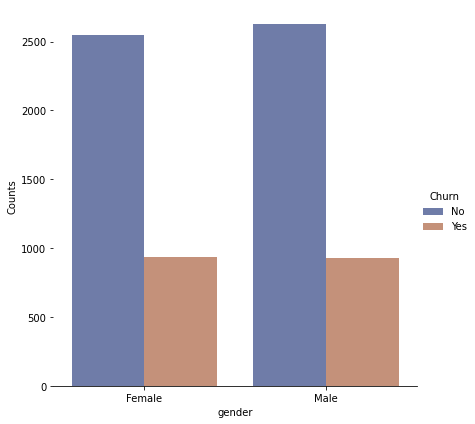

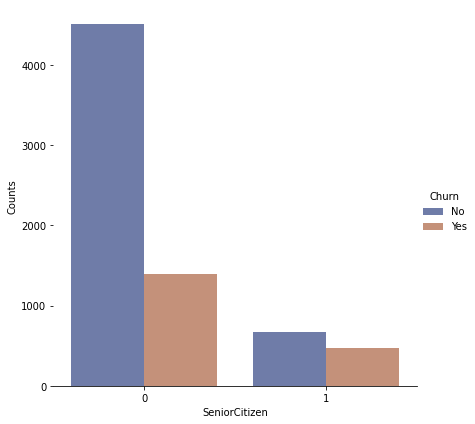

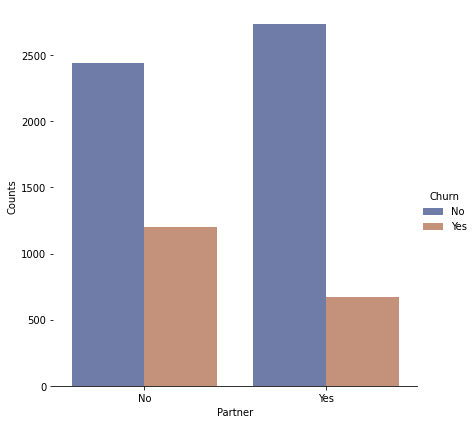

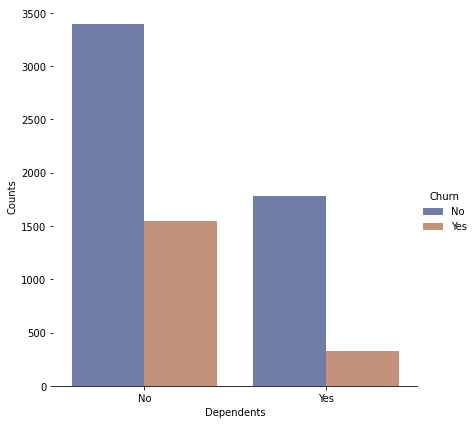

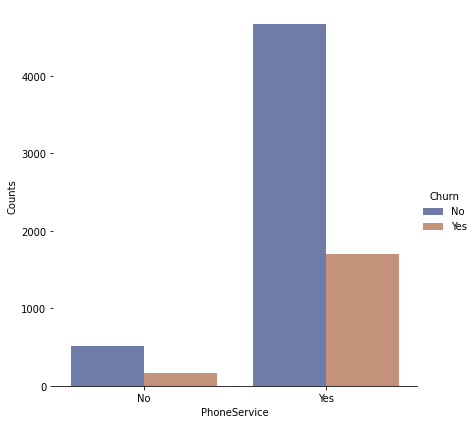

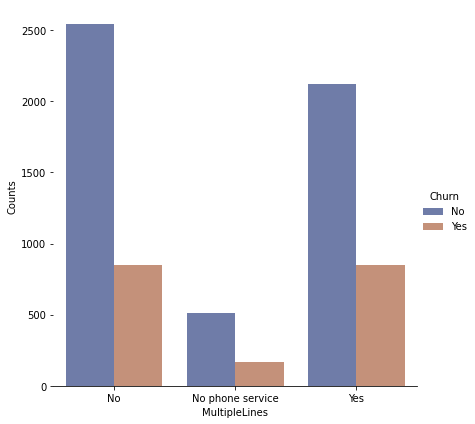

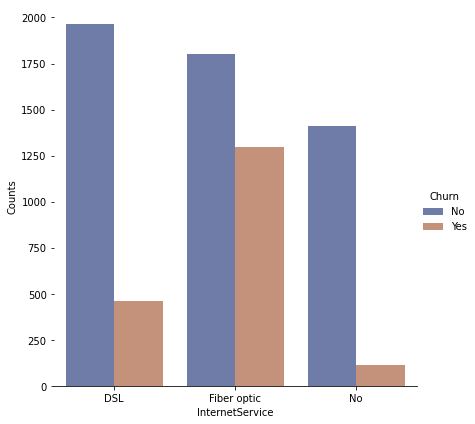

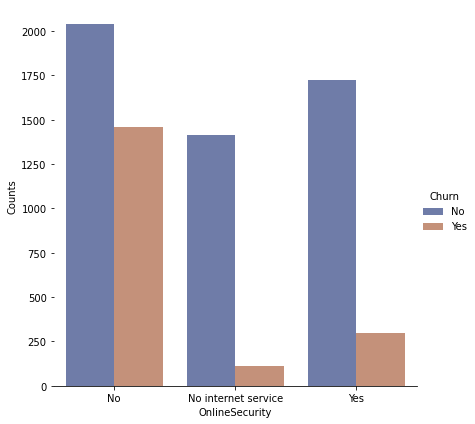

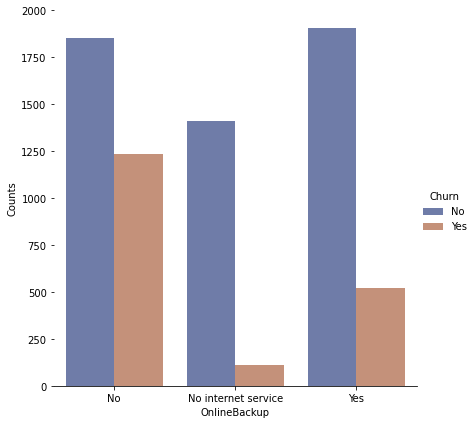

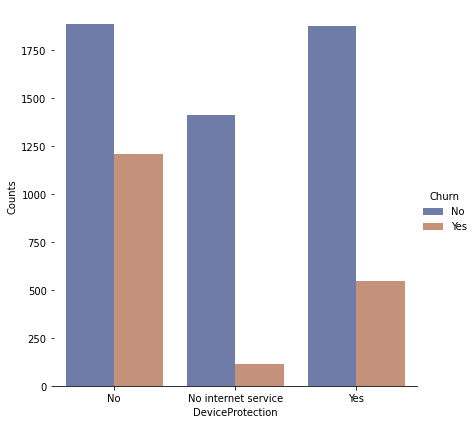

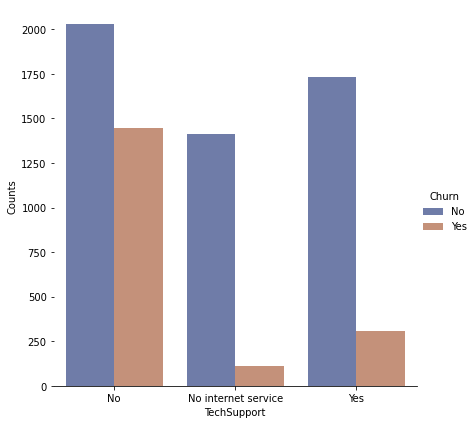

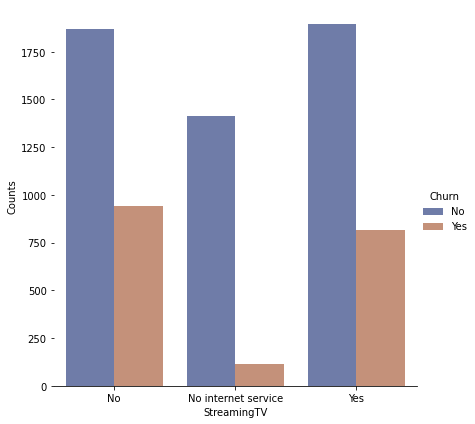

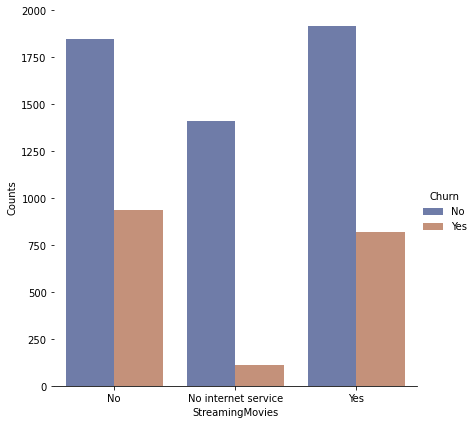

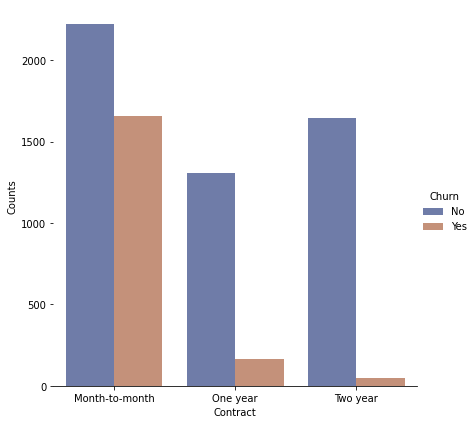

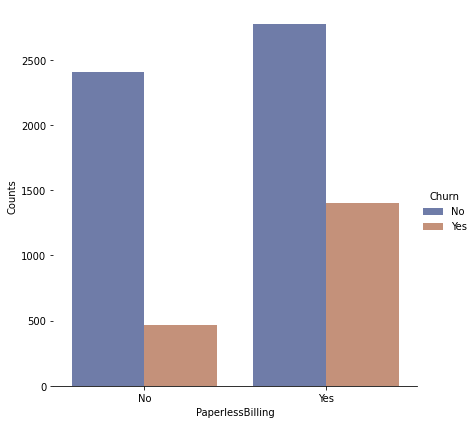

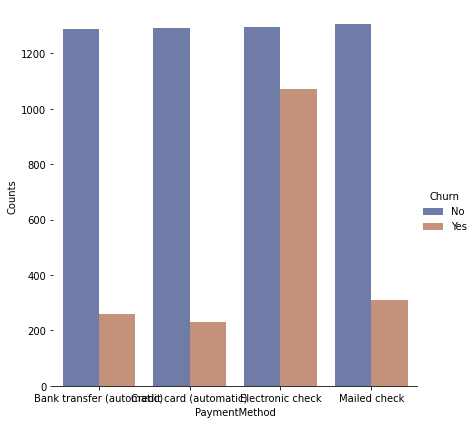

In [15]:
for i in range(len(categorical_variables)):
    
    counts = df.groupby([categorical_variables[i]])['Churn'].value_counts().rename('Count').reset_index()
    
    g=sns.catplot(
        data=counts, kind="bar",
        x=categorical_variables[i], y="Count", hue="Churn",
        palette="dark", alpha=.6, height=6)
    
    g.despine(left=True)
    g.set_axis_labels(categorical_variables[i], "Counts")
    g.legend.set_title("Churn")

### Converting categorical variables into numerical with One-Hot-Encoding

In [16]:
df_dummies = pd.get_dummies(df[categorical_variables])
df_dummies['Churn'] = df['Churn']
df_dummies['Churn'] = df_dummies['Churn'].map({'No': 0, 'Yes': 1})
df_dummies.head()

,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
0,1,0,1,0,0,1,1,0,1,0,...,1,0,0,0,1,0,0,1,0,0
1,0,1,1,0,1,0,1,0,0,1,...,0,1,0,1,0,0,0,0,1,0
2,0,1,1,0,1,0,1,0,0,1,...,1,0,0,0,1,0,0,0,1,1
3,0,1,1,0,1,0,1,0,1,0,...,0,1,0,1,0,1,0,0,0,0
4,1,0,1,0,1,0,1,0,0,1,...,1,0,0,0,1,0,0,1,0,1


# Investigating Correlations between variables

<AxesSubplot:>

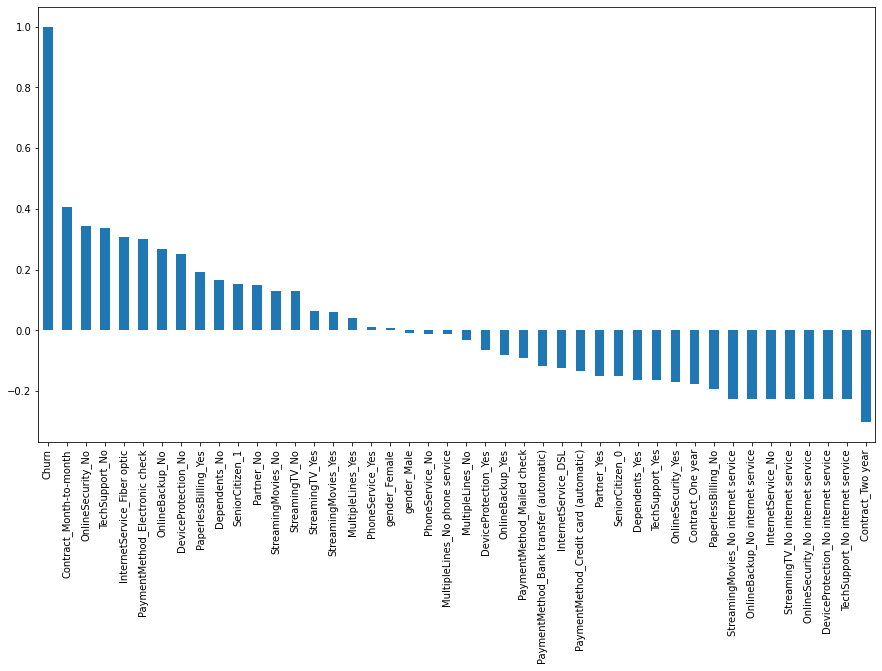

In [17]:
#Get Correlation of "Churn" with other variables:
plt.figure(figsize=(15,8))
df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')